# Parsing data using auvlib

In this part of the tutorial, we will look at parsing and inspecting different kinds of data using auvlib. Specifically, we will look at using the [`auvlib.data_tools`](https://nilsbore.github.io/auvlib-docs/data_tools.html) library to parse:

* Positioning data
* Sound speed data
* Multibeam data
* Sidescan data

In addition to what we will look at in this tutorial,
auvlib can also parse
[`.gsf`](https://nilsbore.github.io/auvlib-docs/gsf_data.html) files,
[`.xyz`](https://nilsbore.github.io/auvlib-docs/xyz_data.html) files
and some
[`ascii` formats exported from NaviEdit](https://nilsbore.github.io/auvlib-docs/std_data.html#auvlib.data_tools.std_data.nav_entry).

## Getting started

Let us start by importing the necessary libraries, that are used for parsing `.all`, `.xtf` and `.asvp` files.
The library documentation is available at [std_data](https://nilsbore.github.io/auvlib-docs/std_data.html), [all_data](https://nilsbore.github.io/auvlib-docs/all_data.html), [xtf_data](https://nilsbore.github.io/auvlib-docs/xtf_data.html) and [csv_data](https://nilsbore.github.io/auvlib-docs/csv_data.html) respectively. 

In [1]:
from auvlib.data_tools import std_data, all_data, xtf_data, csv_data
from auvlib.bathy_maps import draw_map
import matplotlib.pyplot as plt
import numpy as np

Now let's set the paths where we can find the respective files:

In [2]:
xtf_folder = "example_data/xtf" # folder containing .xtf sidescan files
all_folder = "example_data/all" # folder containing .all files from Kongsberg multibeam
asvp_file = "example_data/sound_speed.asvp" # standard .asvp sound speed profile file

## Parsing data

All of auvlib uses the same functions for parsing files and folders. If you want to parse with several folders you use and instance of the `<data_structure>.parse_folder(folder)` function, while if you use a file, you use `<data_structure>.parse_file(file)`.

Since the data structure [`xtf_sss_ping`](https://nilsbore.github.io/auvlib-docs/xtf_data.html?highlight=xtf_sss_ping#auvlib.data_tools.xtf_data.xtf_sss_ping) is used to represent sidescan pings in an `.xtf` file, you use the following call to parse a folder into a vector containing several [`xtf_sss_ping`](https://nilsbore.github.io/auvlib-docs/xtf_data.html?highlight=xtf_sss_ping#auvlib.data_tools.xtf_data.xtf_sss_ping)s.

In [3]:
xtf_pings = xtf_data.xtf_sss_ping.parse_folder(xtf_folder)
# On Windows, you gotta load the already parsed version, as the xtf parser does not yet work there:
#xtf_pings = xtf_data.xtf_sss_ping.read_data("example_data/parsed_xtf.cereal")

Similarly to parse `.all` multibeam pings, we use [`all_data.all_mbes_ping.parse_folder`](https://nilsbore.github.io/auvlib-docs/all_data.html#auvlib.data_tools.all_data.all_mbes_ping.parse_folder).

## Example: Looking at xtf data

In [4]:
xtf_first = xtf_pings[0]
help(xtf_first) # TODO: add description to all members in docs

Help on xtf_sss_ping in module auvlib.data_tools.xtf_data object:

class xtf_sss_ping(pybind11_builtins.pybind11_object)
 |  Class for xtf sidescan type
 |  
 |  Method resolution order:
 |      xtf_sss_ping
 |      pybind11_builtins.pybind11_object
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: auvlib.data_tools.xtf_data.xtf_sss_ping) -> None
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  first_in_file_
 |      Is first measurement in file?
 |  
 |  heading_
 |      Radian yaw in ENU coordinates
 |  
 |  lat_
 |      Latitude
 |  
 |  long_
 |      Longitude
 |  
 |  pitch_
 |      Radian pitch in ENU coordinates
 |  
 |  port
 |      Port measurement
 |  
 |  pos_
 |      Position in ENU coordinates
 |  
 |  roll_
 |      Radian roll in ENU coordinates
 |  
 |  sound_vel_
 |      Sound speed in m/s
 |  
 |  stbd
 |      Starboard measurement
 |  
 |  t

Text(0.5,1,'Starboard intensities')

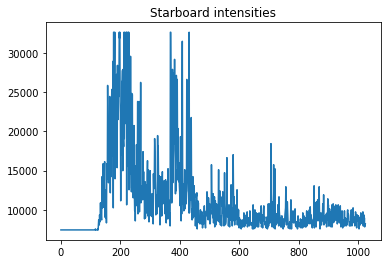

In [5]:
plt.plot(xtf_first.stbd.pings)
plt.title("Starboard intensities")

We can also use the [`make_waterfall_image`](https://nilsbore.github.io/auvlib-docs/xtf_data.html?highlight=make_waterfall#auvlib.data_tools.xtf_data.make_waterfall_image)
function to view the intensities as a waterfall image.

Text(0.5,1,'Intensities')

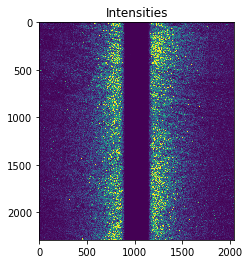

In [6]:
im = xtf_data.make_waterfall_image(xtf_pings) # make a waterfall image
plt.imshow(im) # show image
plt.title("Intensities")

## Example: Looking at all data

Text(0.5,1,'Height (m)')

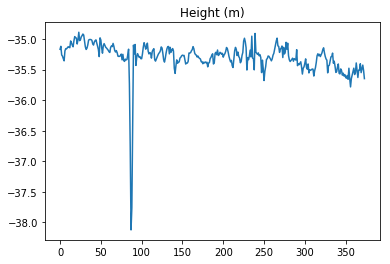

In [7]:
all_pings = all_data.all_mbes_ping.parse_folder(all_folder)
all_entries = all_data.all_nav_entry.parse_folder(all_folder)

plt.plot([beam[2] for beam in all_pings[-1].beams])
plt.title("Height (m)")

Text(0.5,1,'Height (m)')

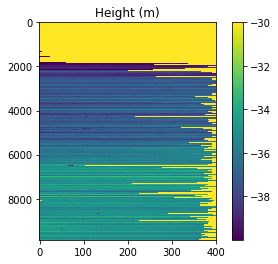

In [8]:
waterfall = [[float(beam[2]) for beam in ping.beams] + [0. for i in range(0, 400-len(ping.beams))] for ping in all_pings]
plt.imshow(waterfall, aspect=0.05, vmax = -30.)
plt.colorbar()
plt.title("Height (m)")

We can also look at the attitude entries to show the position at any given time in latitude, longitude coordinates.

Text(0,0.5,'Latitude')

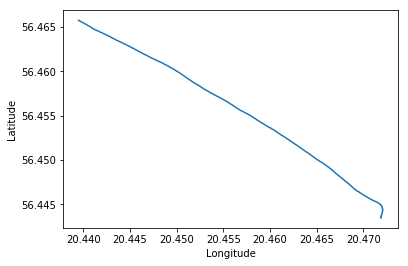

In [9]:
pos = np.array([[entry.long_, entry.lat_] for entry in all_entries])
plt.plot(pos[:, 0], pos[:, 1])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## Standard data structures

In `std_data`, we define data structures that we usually translate file type-specific data structures to in order to make our programs more generic. Currently it includes:

* [std_data.mbes_ping](https://nilsbore.github.io/auvlib-docs/std_data.html#auvlib.data_tools.std_data.mbes_ping) - Common multibeam ping definition
* [std_data.nav_entry](https://nilsbore.github.io/auvlib-docs/std_data.html#auvlib.data_tools.std_data.nav_entry) - Common position definition, defined in ENU coordinates
* [std_data.attitude_entry](https://nilsbore.github.io/auvlib-docs/std_data.html#auvlib.data_tools.std_data.attitude_entry) - Common attitude definition, defined in ENU coordinates TODO: Update documentation


Text(0,0.5,'Northing')

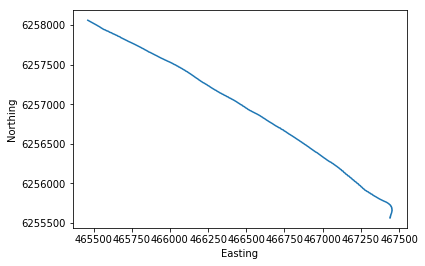

In [10]:
std_pings = all_data.convert_matched_entries(all_pings, all_entries)
pos = np.array([[ping.pos_[0], ping.pos_[1]] for ping in std_pings])
plt.plot(pos[:, 0], pos[:, 1])
plt.xlabel('Easting')
plt.ylabel('Northing')

auvlib contains many functions for inspecting and processing the standard data structures.
As an example, we can use the [`draw_map` library](https://nilsbore.github.io/auvlib-docs/draw_map.html)
to show a bathymetry height map, together with the vehicle track.

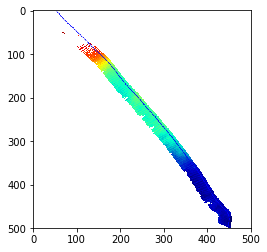

In [11]:
d = draw_map.BathyMapImage(std_pings, 500, 500) # create a bathymetry height map of size 500x500 pixels
d.draw_height_map(std_pings) # draw the height map
d.draw_track(std_pings) # draw the track of the vehicle
im = d.make_image() # save the height map to "height_map.png"
plt.imshow(im)

## Storing and loading parsed data

All data structures have functions for reading and loading parsed and processed data.
For storing a vector of one kind of data, you can use the
`<module>.write_data(data, file)` function,
while if you read a file, you use `<module>.<data_structure>.read_data(file)`.
So for example if we want to write and read the parsed all multibeam pings, we can use the
[`all_data.write_data`](https://nilsbore.github.io/auvlib-docs/all_data.html#auvlib.data_tools.all_data.write_data)
and
[`all_data.all_mbes_ping.read_data`](https://nilsbore.github.io/auvlib-docs/all_data.html#auvlib.data_tools.all_data.all_mbes_ping.read_data)
functions.

In [12]:
all_data.write_data(all_pings, "all_pings.cereal") # writing the multibeam pings to file
all_pings = all_data.all_mbes_ping.read_data("all_pings.cereal") # reading the same file

## Summing up

Now we know how to parse data using auvlib.
Let us do some processing of the data, including
geo-referencing sidescan data. Open the
[processing tutorial](processing.ipynb) to continue.